## 2.Exploratory Data Analysis (EDA)

* **Perform EDA using pandas and visualizations (e.g., using Matplotlib or Seaborn) to understand the data distributions, correlations, and relationships between features.**
* **Identify potential features for modeling and any data preprocessing required (e.g., scaling, handling missing values).**


**We are performing the following EDA steps:**


#
### 1. **Summary Statistics**
- Key metrics such as mean, median, mode, standard deviation, etc.
- **Missing Values:** Identification and count.
- **Value Counts for Categorical Features:** Understand the distribution of categorical variable#s.

### 2. **Visualizations**
- **Data Distribution:**
  - Histograms: Visualize the frequency distribution of numerical features.
  - Density Plots: Represent the probability density of numerical data.
  - Box Plots: Identify the spread and potential outliers in the data.
- **Relationships between Features:**
  - Correlation Matrix: Visualize relationships between numerical features.
  - Scatter Plots: Explore pairwise relationships betwee#n features.

### 3. **Countplots for Categorical Features**
- Visualize the frequency of each category in categor#ical features.

### 4. **Outlier Analysis**
- Detection of potential outliers using box plots and the interquartile ra#nge (IQR) method.

### 5. **Grouped Aggregations by Satisfaction Level**
- Analyze customer satisfaction trends by grouping data based on satisfaction levels and aggregating other features like age, income, or purchase history.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Loading the dataset
data = pd.read_csv("simulated_data.csv")

In [3]:
print("Basic Information:")
print(data.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   customer_id            1000 non-null   int64
 1   age                    1000 non-null   int64
 2   income                 1000 non-null   int64
 3   purchase_history       1000 non-null   int64
 4   customer_satisfaction  1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB
None


In [4]:
# Displaying first few rows
print("\nFirst 5 Rows:")
print(data.head())



First 5 Rows:
   customer_id  age  income  purchase_history  customer_satisfaction
0            1   52   79061              3467                      8
1            2   39   93548              3288                      7
2            3   44   48476              5046                      7
3            4   57   63092              4041                      8
4            5   53   67105              4919                      9


### 1. Summary statistics

In [5]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       customer_id          age         income  purchase_history  \
count  1000.000000  1000.000000    1000.000000        1000.00000   
mean    500.500000    34.037000   67829.074000        4948.26900   
std     288.819436     9.870717   35032.155613         954.59026   
min       1.000000     4.000000   13395.000000        1883.00000   
25%     250.750000    27.750000   43176.750000        4262.75000   
50%     500.500000    34.000000   60658.500000        4947.00000   
75%     750.250000    41.000000   81857.750000        5621.25000   
max    1000.000000    62.000000  292285.000000        7929.00000   

       customer_satisfaction  
count            1000.000000  
mean                6.752000  
std                 1.283021  
min                 4.000000  
25%                 6.000000  
50%                 7.000000  
75%                 8.000000  
max                10.000000  


### Missing Value

In [6]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
customer_id              0
age                      0
income                   0
purchase_history         0
customer_satisfaction    0
dtype: int64


**Since we have created the value so there is no any missing value her**

### Value Counts for Categorical Features

In [7]:

print("\nValue Counts for Customer Satisfaction:")
print(data['customer_satisfaction'].value_counts())


Value Counts for Customer Satisfaction:
customer_satisfaction
7     293
6     269
8     200
5     124
9      57
4      36
10     21
Name: count, dtype: int64


## 2.Visualizations
### A. Data Distribution

### 1. Histograms for numerical features

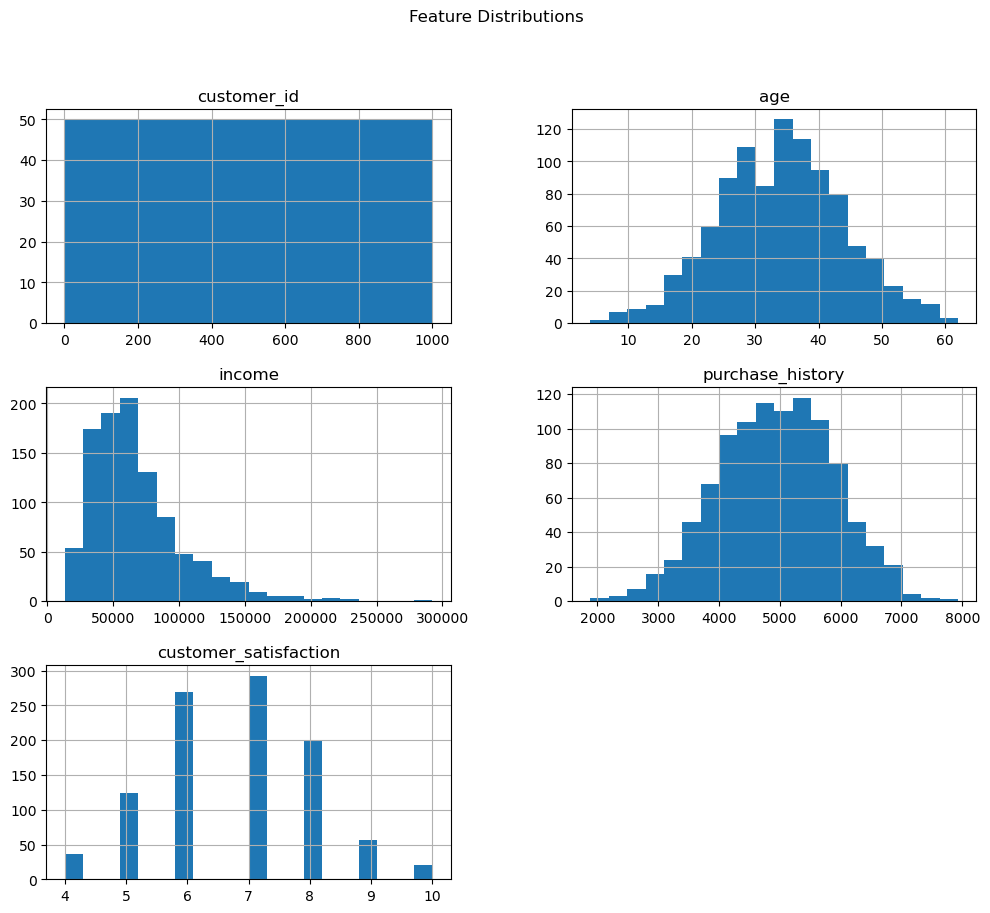

In [8]:
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

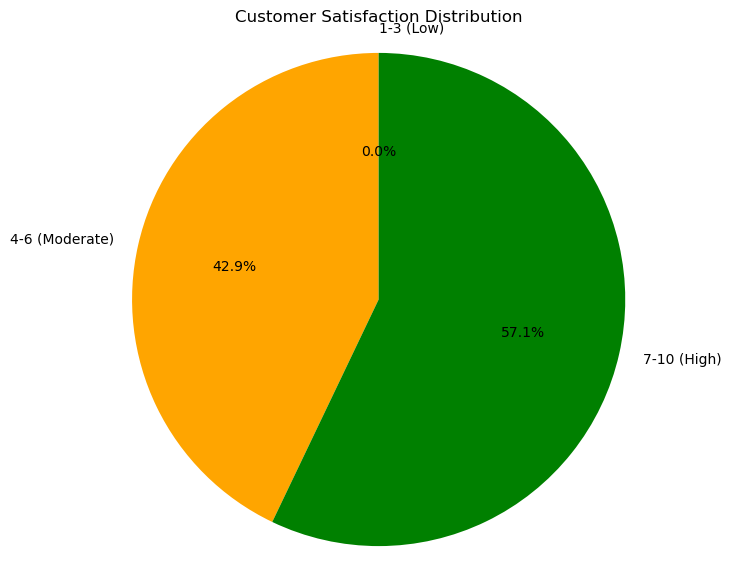

In [4]:
# Categorizing satisfaction scores
categories = {
    "1-3 (Low)": 0,
    "4-6 (Moderate)": 0,
    "7-10 (High)": 0,
}

for score in data["customer_satisfaction"]:
    if 1 <= score <= 3:
        categories["1-3 (Low)"] += 1
    elif 4 <= score <= 6:
        categories["4-6 (Moderate)"] += 1
    elif 7 <= score <= 10:
        categories["7-10 (High)"] += 1

# Extracting data for the pie chart
labels = categories.keys()
sizes = categories.values()
colors = ['red', 'orange', 'green']  # Colors for each category

# Creating the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Customer Satisfaction Distribution")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()






### 2. Density plots

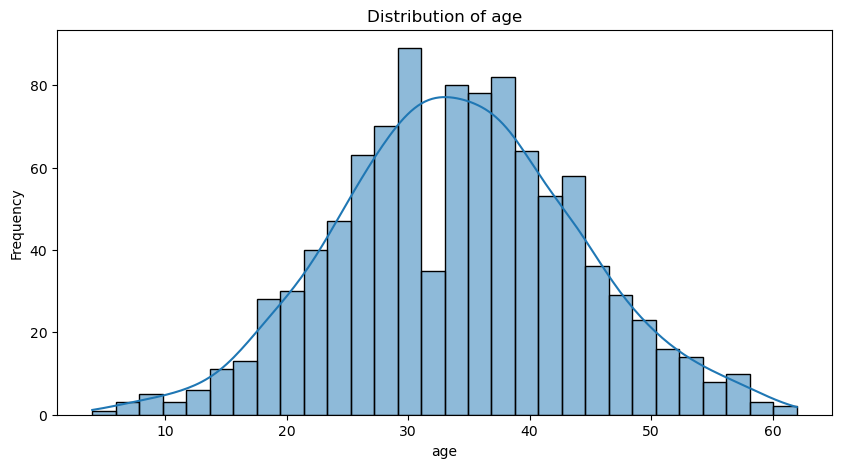

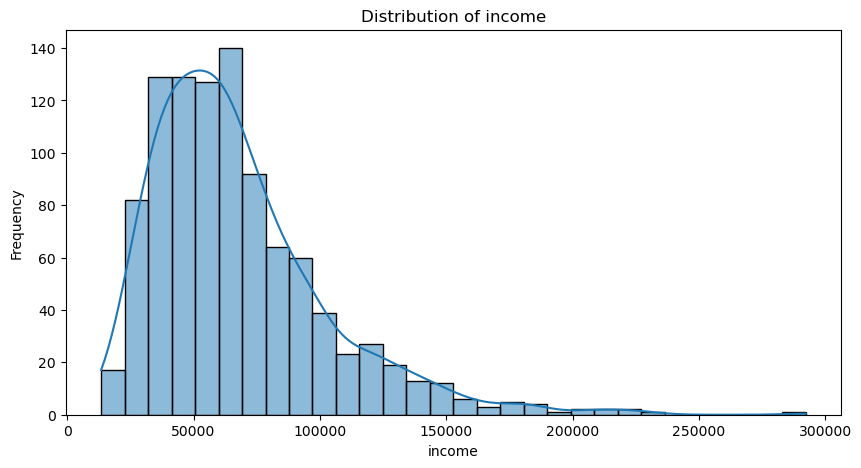

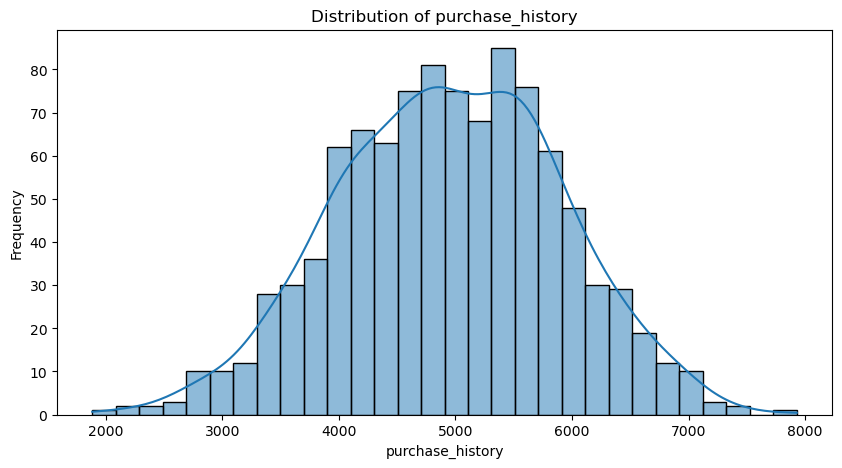

In [9]:
numerical_columns = ['age', 'income', 'purchase_history']
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### 3. Boxplots to identify outliers

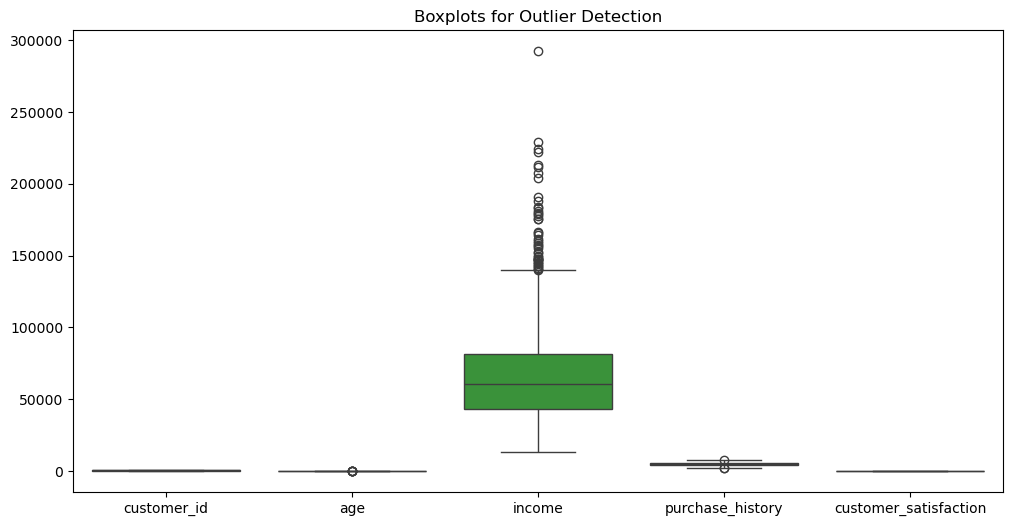

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Boxplots for Outlier Detection")
plt.show()

## B.Relationships between Features

### 1. Correlation matrix

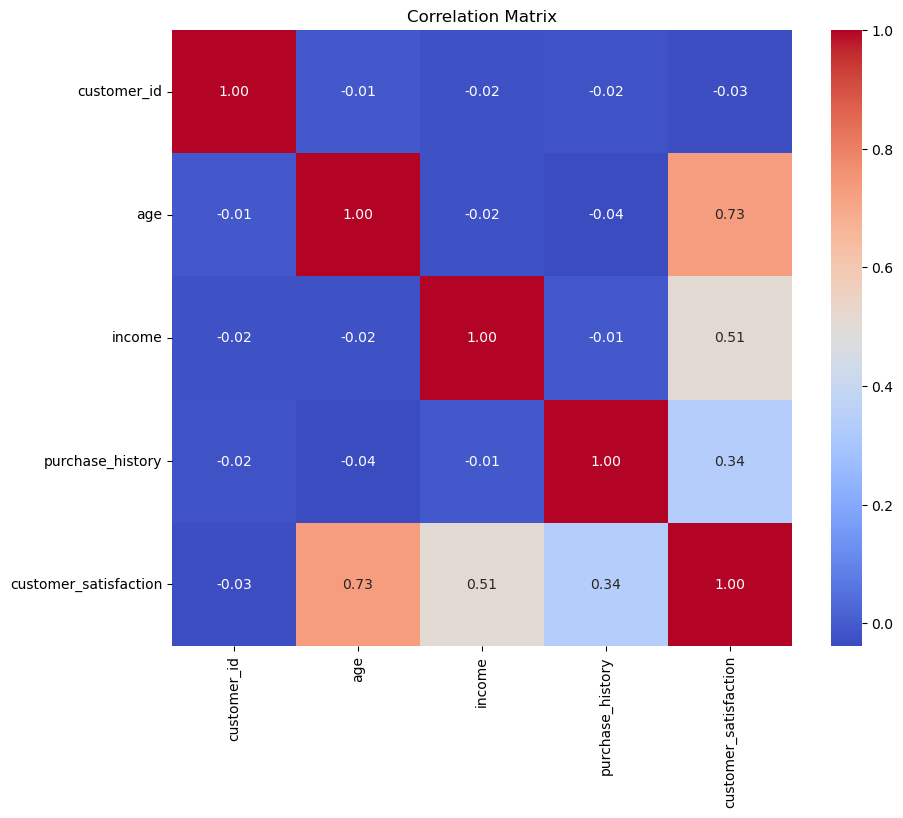

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### 2. Pairplot for relationships (for smaller datasets)

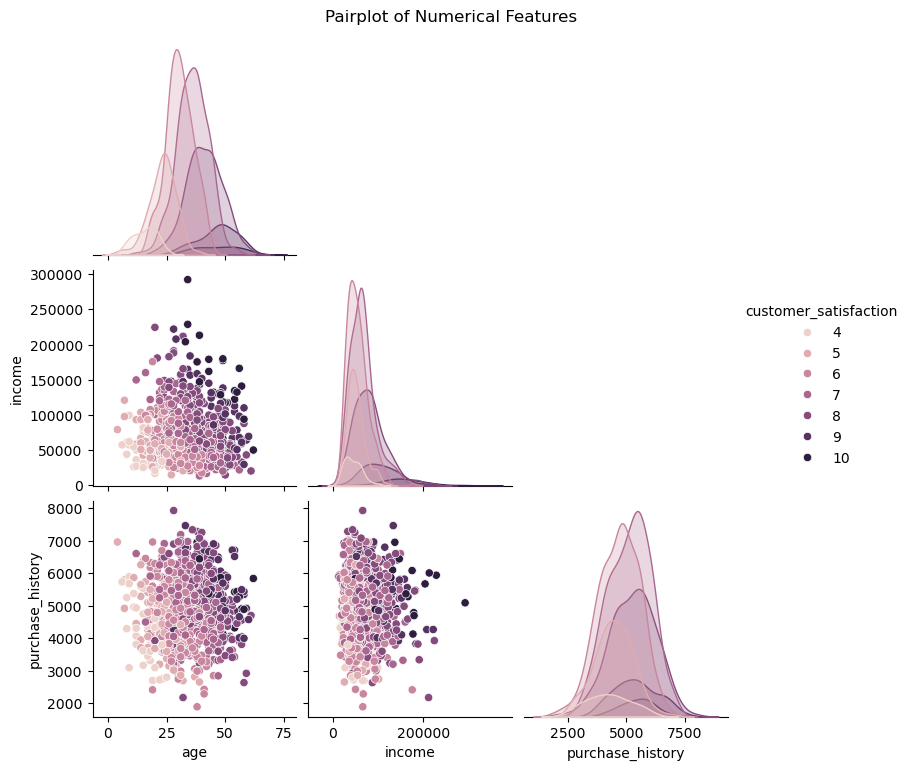

In [12]:
#  Scatterplot Relationships
sns.pairplot(data, vars=numerical_columns, hue="customer_satisfaction", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


### 3. Countplot for categorical features

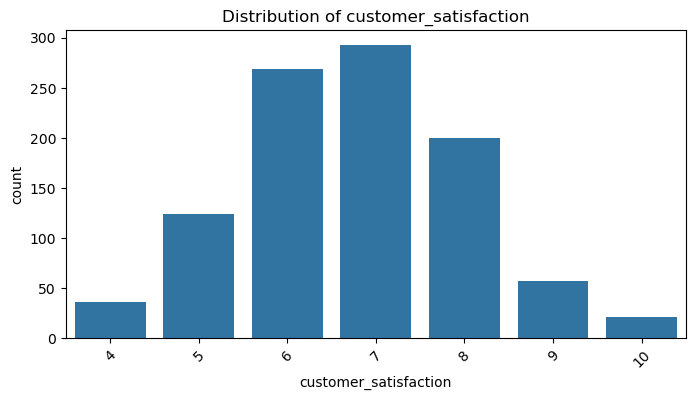

In [13]:
categorical_columns = ['customer_satisfaction']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


### 4. Grouped Aggregations by Satisfaction Level

In [14]:

grouped_stats = data.groupby('customer_satisfaction').agg({
    'age': ['mean', 'std'],
    'income': ['mean', 'std'],
    
    'purchase_history': ['mean', 'std']
}).reset_index()

print("\nGrouped Statistics by Customer Satisfaction:")
print(grouped_stats)



Grouped Statistics by Customer Satisfaction:
  customer_satisfaction        age                   income                \
                              mean       std           mean           std   
0                     4  15.777778  4.940278   45112.416667  18969.265371   
1                     5  23.241935  5.818908   51987.274194  19400.317262   
2                     6  30.509294  5.821738   54760.486989  23155.546457   
3                     7  35.941980  6.762612   65558.119454  27670.973300   
4                     8  41.075000  7.627600   82262.440000  36571.976642   
5                     9  46.596491  8.101719  106183.263158  39818.597905   
6                    10  46.571429  8.840653  157836.714286  51046.492141   

  purchase_history              
              mean         std  
0      4241.805556  908.597626  
1      4468.322581  817.148876  
2      4686.721190  877.946209  
3      5129.928328  891.630578  
4      5273.615000  979.876449  
5      5405.438596  908.78910

### 5. Outlier Analysis (IQR Method)Outlier Detection:

**Uses IQR to identify and count outliers for numerical features.**

In [15]:

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
    print(f"\nOutliers for {col}: {len(outliers)} rows flagged.")


Outliers for age: 6 rows flagged.

Outliers for income: 44 rows flagged.

Outliers for purchase_history: 3 rows flagged.


In [16]:
correlation_threshold = 0.3
high_corr_features = data.corr()["customer_satisfaction"].abs() > correlation_threshold
print("\nFeatures with high correlation to customer_satisfaction:")
print(data.columns[high_corr_features])



Features with high correlation to customer_satisfaction:
Index(['age', 'income', 'purchase_history', 'customer_satisfaction'], dtype='object')
